# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.

<h2> 1. Is the distribution of body temperatures normal? </h2>
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
    

Not exactly but the data is approximately normally distributed. See below, the sciipy stats normalTest shows a p-value of .258, and with a 5% threshold, this can be considered a decent representative sample (not by chance).

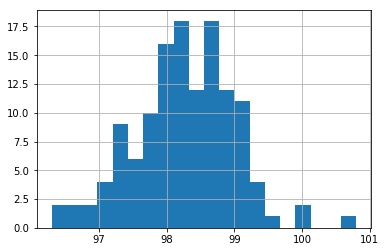

In [3]:
df['temperature'].hist(bins=20)

In [4]:
scipy.stats.mstats.normaltest(df['temperature'], axis=0)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

<h2>2. Is the samle size large? Are the observations independent?</h2>

with a size of 130 samples, it isn't a very large dataset. The observations are independent (see proof below)

In [5]:
print(len(df))

130


To test independence with chi-squared test, i need the table of frequcy. I want rows: Female | Male, and columns: Temp, HR

In [6]:
col1 = df.drop('heart_rate',axis=1)[df['gender']=='F'].groupby('temperature').count()
col1.columns = ['F']
col2 = df.drop('heart_rate',axis=1)[df['gender']=='M'].groupby('temperature').count()
col2.columns = ['M']
df_contg = col1.join(col2,how='outer')
df_contg = df_contg.fillna(0)
df_contg = df_contg.T
df_contg.head(4)


temperature,96.3,96.4,96.7,96.8,96.9,97.0,97.1,97.2,97.3,97.4,...,98.9,99.0,99.1,99.2,99.3,99.4,99.5,99.9,100.0,100.8
F,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,...,1.0,2.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0
M,1.0,0.0,1.0,0.0,1.0,1.0,3.0,1.0,1.0,4.0,...,1.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [7]:
#now that we have frequency table, can test for independence:
stats.chi2_contingency(observed= df_contg)

(25.144877344877344,
 0.83459920689748079,
 33,
 array([[ 0.5,  0.5,  1. ,  0.5,  0.5,  0.5,  1.5,  1.5,  0.5,  2.5,  1. ,
          2. ,  1.5,  3.5,  2.5,  5.5,  1.5,  5. ,  2.5,  4.5,  1.5,  5. ,
          4. ,  5. ,  1. ,  2.5,  1.5,  1.5,  1. ,  1. ,  0.5,  0.5,  0.5,
          0.5],
        [ 0.5,  0.5,  1. ,  0.5,  0.5,  0.5,  1.5,  1.5,  0.5,  2.5,  1. ,
          2. ,  1.5,  3.5,  2.5,  5.5,  1.5,  5. ,  2.5,  4.5,  1.5,  5. ,
          4. ,  5. ,  1. ,  2.5,  1.5,  1.5,  1. ,  1. ,  0.5,  0.5,  0.5,
          0.5]]))

As expected, given the high p-value of 0.83, the test result does not detect a significant relationship between the variables Temp and Gender.

Now test for independence with HR:

In [8]:
col3 = df.drop('temperature',axis=1)[df['gender']=='F'].groupby('heart_rate').count()
col3.columns = ['F']
col4 = df.drop('temperature',axis=1)[df['gender']=='M'].groupby('heart_rate').count()
col4.columns = ['M']
df_contg2 = col3.join(col4,how='outer')
df_contg2 = df_contg2.fillna(0)
df_contg2 = df_contg2.T

In [9]:
#now that we have frequency table, can test for independence:
stats.chi2_contingency(observed= df_contg2)

(34.695238095238096,
 0.25389836504297797,
 30,
 array([[ 1. ,  0.5,  0.5,  1. ,  1. ,  0.5,  3. ,  1.5,  2. ,  1. ,  3. ,
          3. ,  3.5,  3. ,  2.5,  5. ,  3. ,  2.5,  1.5,  3.5,  5. ,  3.5,
          2. ,  2.5,  2.5,  2. ,  2. ,  0.5,  1. ,  0.5,  1. ],
        [ 1. ,  0.5,  0.5,  1. ,  1. ,  0.5,  3. ,  1.5,  2. ,  1. ,  3. ,
          3. ,  3.5,  3. ,  2.5,  5. ,  3. ,  2.5,  1.5,  3.5,  5. ,  3.5,
          2. ,  2.5,  2.5,  2. ,  2. ,  0.5,  1. ,  0.5,  1. ]]))

While this p-value is not as high as the one for temperature, a value of .25 is high and we can say the result does not detect a significant relationship between the variables HR and Gender.

<h2> 3. Is the true population mean really 98.6 degrees F? </h2>

useful resources:<br/> <a src='https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_1samp.html'>for t-test</a><br/>
<a src='http://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-t-values-and-p-values-in-statistics'>for t-p eval</a>

<p> I'll use a one-sample test here, as we're dealing with 1 independent sample, not 2.</p>

<p> I'll also use a t-test since a z-test requires knowing the population mean and std dev, which we don't have. All we have is a hypothesis (null hypoth) to test. Also, a t distribution is usually used to analyze the population when the sample is small, which ours is.</p>

In [10]:
import plotly.plotly as py
py.sign_in('aguerra14', 'ogygYT7QEYcFkH725V9E')
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF


In [11]:
true_mu = 98.6 #null hypothesis that pop mean is 98.6

onesample_results = scipy.stats.ttest_1samp(df['temperature'], true_mu)
matrix_onesample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', onesample_results[0], onesample_results[1]]
]

onesample_table = FF.create_table(matrix_onesample, index=True)
py.iplot(onesample_table, filename='onesample-table')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~aguerra14/0 or inside your plot.ly account where it is named 'onesample-table'


Given that the probability of obtaining a t-value this high or higher when sampling from this population is so low, it’s more likely this sample doesn’t come from this population. It's much more likely that this sample comes from a different population.

The larger the absolute value of the t-value, the smaller the p-value, and the greater the evidence against the null hypothesis.

<h3>trying with z-test:</h3>

<h3>4. At what temperature should we consider someone's temperature to be "abnormal"?</h3>

In [ ]:
#assuming a standard deviation (rough estimate)
import math
n, min_max, mean, var, skew, kurt = stats.describe(df['temperature'])
std=math.sqrt(var)
stats.norm.interval(0.05,loc=mean,scale=std)

In [ ]:
#using statsmodels to do more accurate estimation without knowing the standard deviation:
import statsmodels.stats.api as sms
sms.DescrStatsW(df['temperature']).tconfint_mean()

In [ ]:

sample_size = len(df['temperature'])
sample = df['temperature']
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df=24)  # Get the t-critical value*

print("t-critical value:")                  # Check the t-critical value
print(t_critical)                        

sample_stdev = sample.std()    # Get the sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)
print("Margin of Error:")
print(margin_of_error)
abnormal = ((max(confidence_interval)+margin_of_error),(min(confidence_interval)-margin_of_error))
print("'Abnormal' temperatures would be outside of this range: ")
print(abnormal)

<h4> Given a t confidence interval (two sided), any temperature outside of [97.984 , 98.515] is "abnormal" e.i. out of the average population (though I don't love that distiction that "not average" means "abnormal".</h4>

<a src='http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-23-point.html'> another good resource </a>

<h4> Given a t confidence interval (two sided), any temperature outside of [97.984 , 98.515] is "abnormal" e.i. out of the average population (though I don't love that distiction that "not average" means "abnormal".</h4>

<a src='http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-23-point.html'> another good resource </a>

<h2>5. Is there a significant difference between males and females in normal temperature?</h2>

<p>Use the two-sample t-test to determine whether the difference between means found in the sample is significantly different from the hypothesized difference between means </p>

In [31]:
diff_mean_test = scipy.stats.ttest_ind(df[df['gender']=='F']['temperature'],df[df['gender']=='M']['temperature'])

In [32]:
diff_mean_test


Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

<p>p-value of .024 is < .25 and therefore acceptable. There is a difference of means between men and women.</p>